In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def func(x):
    return x**2
def func_grad(x):
    return 2*x

In [3]:
def gradeint_descent(lr, func_grad):
    x = -10
    x_values = [x]
    for i in range (10):
        x -= lr * func_grad(x)
        x_values.append(x)
    print("iteration 10, x: %s"%x)
    return x_values

In [4]:
def search_path(x_vals, func):
    x_line = np.arange(-15,15,0.01)
    plt.plot(x_line, [func(x) for x in x_line])
    plt.plot(x_vals, [func(x) for x in x_vals],"ro-")

iteration 10, x: -1.0737418240000003


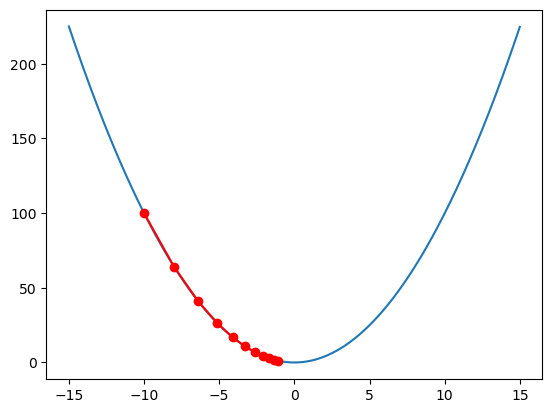

In [5]:
x_values = gradeint_descent(0.1, func_grad)
search_path(x_values, func)

In [6]:
def func(x1, x2):
    return x1**2 + 2 * x2**2
def func_grad(x1,x2):
    return (2*x1, 4*x2)

In [7]:
class Optimizers:
    def __init__(self, lr_schedule, rate = 0.01):
        self.lr_schedule = self.lr(lr_schedule, rate)
        
    def lr(self, lr_schedule, rate):
        if lr_schedule == "constant":
            return self.constant_lr(rate)
    
    def constant_lr(self, rate):
        return rate
    
    def gradient_descent(self, x1, x2, t1,t2, func_grad):
        gr_x1, gr_x2 = func_grad(x1,x2)
        return x1 - self.lr_schedule*gr_x1, x2 - self.lr_schedule*gr_x2, 0, 0
    
    def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad):
        gr_x1, gr_x2 = func_grad(x1, x2)
        gr_x1 += np.random.normal(0, 1)
        gr_x2 += np.random.normal(0, 1)
        return x1 - self.lr_schedule*gr_x1,x2-self.lr_schedule*gr_x2, 0, 0

In [8]:
def search(optimizer, func_grad, iteration = 20):
    x1, x2, t1, t2 = -5, -2, 0, 0
    x_iterations = [(x1,x2)]
    for i in range(iteration):
        x1, x2, t1,t2 = optimizer(x1, x2, t1, t2 ,func_grad)
        x_iterations.append((x1,x2))
    print("epoch {}, x1:{}, x2:{}".format(i+1, x1,x2))
    return x_iterations

In [9]:
def search_path(func, x_iterations):
    plt.plot(*zip(*x_iterations),"-o", color = "r")
    x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
    plt.contourf(x1, x2, func(x1,x2))
    plt.xlabel("x1")
    plt.ylabel("x2")
    

In [10]:
list(zip([1, 2, 3],["a", 'b', "c"]))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [11]:
list(zip([(1, 3), (2, 8), (3, 15)]))

[((1, 3),), ((2, 8),), ((3, 15),)]

In [12]:
list(zip(*[(1, 3), (2, 8), (3, 15)]))

[(1, 2, 3), (3, 8, 15)]

epoch 20, x1:-0.057646075230342354, x2:-7.312316880125945e-05


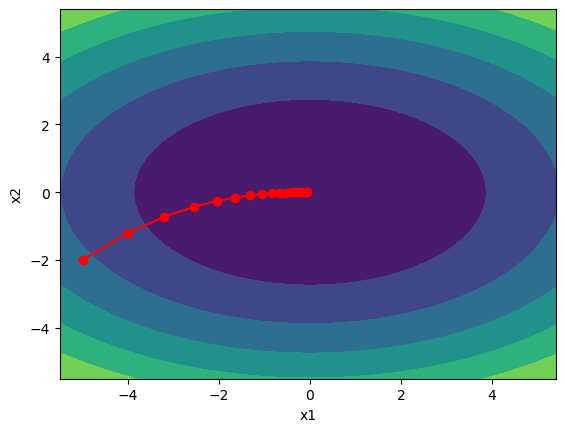

In [13]:
opt = Optimizers("constant", 0.1)
search_path(func, search(opt.gradient_descent,func_grad))

epoch 20, x1:8.532685578541144e-05, x2:0.10945501787664842


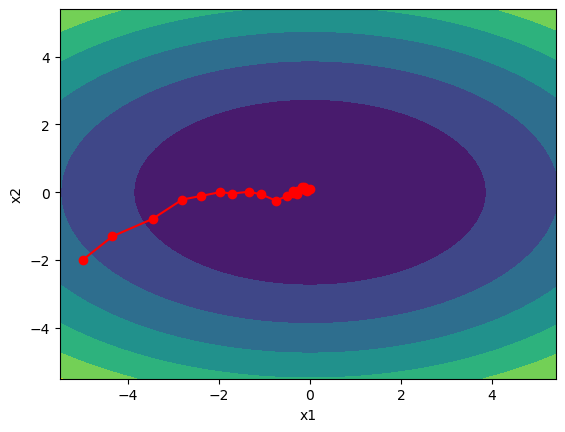

In [14]:
opt = Optimizers("constant", 0.1)
search_path(func, search(opt.stochastic_gradient_descent,func_grad))